# Dataset creation

In [2]:
import random
import math
import matplotlib.pyplot as plt

In [3]:
def generateVector(l = 0, r = 1000, count = 1000):
    result = []
    for i in range(0, count):
        result.append(random.randrange(l, r))
    return result

In [4]:
def generateCoordinates(l = 0, r = 1000, count = 1000):
    first = generateVector(l, r, count)
    second = generateVector(l, r, count)
    result = []
    for i in range(0, count):
        result.append((first[i], second[i]))
    return result

In [5]:
def splitToRanges(coordinatesLen, rangesCount):
    result = []
    for i in range(0, rangesCount):
        l = int(coordinatesLen*(i/rangesCount))
        if (i != 0):
            l += 1
        r = int(coordinatesLen*((i+1)/rangesCount))
        if (i == rangesCount - 1):
            r -= 1
        result.append((l,r))
    return result

In [6]:
def clasifyRanges(ranges, classes):
    result = []
    for i in range(0, len(ranges)):
        classifiedRange = (ranges[i][0],ranges[i][1],classes[i])
        result.append(classifiedRange)
    return result

In [7]:
def defineClass(coordinate, classifiedRanges, defaultClass):
    for i in range(0, len(classifiedRanges)):
        classifiedRange = classifiedRanges[i]
        x = coordinate[0]
        y = coordinate[1]
        lRange = classifiedRange[0]
        rRange = classifiedRange[1]
        xInRange = x >= lRange and x <= rRange
        yInRange = y >= lRange and y <= rRange
        if (xInRange and yInRange):
            return classifiedRange[2]
    return defaultClass

In [8]:
def classifyCoordinates(coordinates, classes, defaultClass):
    ranges = splitToRanges(len(coordinates), len(classes))
    classifiedRanges = clasifyRanges(ranges, classes)
    classifiedCoordinates = []
    for i in range(0, len(coordinates)):
        coordinate = coordinates[i]
        coordinatesClass = defineClass(coordinate, classifiedRanges, defaultClass)
        classifiedCoordinates.append((coordinate, coordinatesClass))
    return classifiedCoordinates

In [9]:
def plotClassifiedCoordinates(classifiedCoordinates, colors):
    for i in range(0, len(classifiedCoordinates)):
        coordinate = classifiedCoordinates[i]
        x, y = coordinate[0]
        coordinateClass = coordinate[1]
        color = colors[coordinateClass]
        plt.scatter(x, y, color=color)

In [10]:
red = [1,0,0]
green = [0,1,0]
blue = [0,0,1]
colors = [red, green, blue]
def getClassColor(classNumber):
    return colors[classNumber]

In [11]:
coordinates = generateCoordinates()

In [12]:
classifiedCoordinates = classifyCoordinates(coordinates, [0, 1], 2)

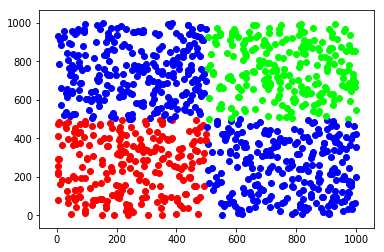

In [13]:
plotClassifiedCoordinates(classifiedCoordinates, colors)

# Parzen Window

In [14]:
def ker(x):
    if (abs(x) <= 300):
        return 1
    else:
        return 0

In [15]:
def showWindow(classifiedCoordinates, targetCoordinate, distance):
    filtered = fetchWindowPoints(classifiedCoordinates, targetCoordinate, distance)
    for i in range(0, len(filtered)):
        (x, y), coordinateClass = filtered[i]
        color = colors[coordinateClass]
        plt.scatter(x, y, color=color)
    (targX, targY) = targetCoordinate
    plt.scatter(targX, targY, color='red', marker='x')

In [16]:
def fetchWindowPoints(classifiedCoordinates, targetCoordinate, distance):
    return [*filter(lambda c: isCoordinateInRange(targetCoordinate, c[0], distance), classifiedCoordinates)]

In [17]:
def countDistance(baseCoordinate, targetCoordinate):
    xBase, yBase = baseCoordinate
    xTarget, yTarget = targetCoordinate
    dist = math.sqrt((xBase - xTarget)**2 + (yBase - yTarget)**2)
    return dist

In [18]:
def isCoordinateInRange(baseCoordinate, targetCoordinate, distance):
    dist = countDistance(baseCoordinate, targetCoordinate)
    return dist <= distance

In [19]:
def isCoordinateInKerRange(baseCoordinate, targetCoordinate, distance):
    dist = countDistance(baseCoordinate, targetCoordinate)
    return ker(dist) == 1

In [20]:
def fetchKerWindowPoints(classifiedCoordinates, targetCoordinate, distance):
    return [*filter(lambda c: isCoordinateInKerRange(targetCoordinate, c[0], distance), classifiedCoordinates)]

In [21]:
def showParzenWindow(classifiedCoordinates, targetCoordinate, distance):
    filtered = fetchWindowPoints(classifiedCoordinates, targetCoordinate, distance)
    filtered = fetchKerWindowPoints(filtered, targetCoordinate, distance)
    for i in range(0, len(filtered)):
        (x, y), coordinateClass = filtered[i]
        color = colors[coordinateClass]
        plt.scatter(x, y, color=color)
    (targX, targY) = targetCoordinate
    plt.scatter(targX, targY, color='red', marker='x')

In [22]:
def getClassesFromClassifiedCoordinates(classifiedCoordinates):
    return set([*map(lambda x: x[1], classifiedCoordinates)])

In [23]:
def defineClassByParzenWindow(classifiedCoordinates, targetCoordinate, distance):
    filtered = fetchWindowPoints(classifiedCoordinates, targetCoordinate, distance)
    filtered = fetchKerWindowPoints(filtered, targetCoordinate, distance)
    classes = getClassesFromClassifiedCoordinates(classifiedCoordinates)
    classesMap = dict()
    for c in classes:
        classesMap[c] = 0
    for classifiedCoordinate in classifiedCoordinates:
        c = classifiedCoordinate[1]
        classesMap[c] += 1
    maxClassCount = 0
    classes = [*classesMap.keys()]
    maxClass = classes[0]
    for c in classes:
        if (classesMap[c] > maxClassCount):
            maxClass = c
            maxClassCount = classesMap[c]
    return maxClass, maxClassCount

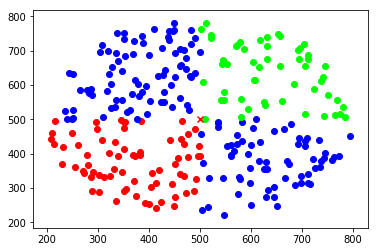

In [24]:
showParzenWindow(classifiedCoordinates, (500,500), 500)

In [25]:
point = (500,500)
classNumber, itemsCount = defineClassByParzenWindow(classifiedCoordinates, point, 500)
print("point {} belongs to class {} which has {} items and {}(R, G, B) color".format(point, classNumber, itemsCount, getClassColor(classNumber)))

point (500, 500) belongs to class 2 which has 532 items and [0, 0, 1](R, G, B) color
